# 回線切れの数
# 武器の詳細追加

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import sklearn
from Functions import prepro
pd.set_option("display.max_columns", 400)
pd.set_option("display.max_rows", 400)

In [2]:
train_df = pd.read_csv("../../data/Processed/train2.csv", index_col='id')
test_df = pd.read_csv("../../data/Processed/test2.csv", index_col="id")
print(train_df.shape)
print(test_df.shape)

(132250, 191)
(28340, 190)


In [3]:
#train_df.head()

In [4]:
#train_df.info()

In [5]:
#test_df.head()

### 武器の情報を個人ごとからチームごとに変える
category1, 2を落とす、

他のカテゴリをチームごとにする

reskinそのまま

In [6]:
# 落とさないほうが精度上がってしまった。。。

"""suffixes = ["-A1", "-A2", "-A3", "-A4", "-B1", "-B2", "-B3", "-B4"]
drop_cols = ["category1", "category2"]

for c in drop_cols:
    for s in suffixes:
        col = c+s
        train_df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)
"""

'suffixes = ["-A1", "-A2", "-A3", "-A4", "-B1", "-B2", "-B3", "-B4"]\ndrop_cols = ["category1", "category2"]\n\nfor c in drop_cols:\n    for s in suffixes:\n        col = c+s\n        train_df.drop(col, axis=1, inplace=True)\n        test_df.drop(col, axis=1, inplace=True)\n'

In [7]:
#train_df.columns

In [8]:
y = train_df["y"]
train_df = train_df.drop("y", axis=1)

In [9]:
# add team info
train_df,  test_df = prepro.addTeamInfo(train_df, test_df, cols=["special", "subweapon", "category1", "category2"])

(160590, 190)
special-A
special-B
subweapon-A
subweapon-B
category1-A
category1-B
category2-A
category2-B
(160590, 278)
complete


In [10]:
# add disconnection info

train_df = prepro.add_disconnection(train_df)
test_df = prepro.add_disconnection(test_df)

In [11]:
# add info about numeric column
from Functions import prepro

num_cols = ["level", "range", "rapid", "atack"]

train_df = prepro.flat(train_df, num_cols)
test_df = prepro.flat(test_df, num_cols)

train_df = prepro.add_numeric_info(train_df, num_cols)
test_df = prepro.add_numeric_info(test_df, num_cols)

In [12]:
# make input

drop_cols = ["id", "lobby", "lobby-mode",  "period", "game-ver", "A1-weapon", "A2-weapon", "A3-weapon", "A4-weapon", \
              "B1-weapon", "B2-weapon", "B3-weapon", "B4-weapon"]
X, test_X = prepro.make_input(train_df, test_df, drop_cols, categorical_encode=True, verbose=False)

In [13]:
print(train_df.shape)
print(test_df.shape)
for col in X.columns:
    print(col)

(132250, 328)
(28340, 328)
mode
stage
A1-rank
A1-level
A2-rank
A2-level
A3-rank
A3-level
A4-rank
A4-level
B1-rank
B1-level
B2-rank
B2-level
B3-rank
B3-level
B4-rank
B4-level
category1-A1
category2-A1
subweapon-A1
special-A1
mainweapon-A1
reskin-A1
range-main-A1
atack-main-A1
rapid-main-A1
vote-main-A1
fav-main-A1
damage_min-sub-A1
damage_max-sub-A1
ink-sub-A1
install_num-sub-A1
good-sub-A1
damage_min-special-A1
damage_max-special-A1
duration-special-A1
good-special-A1
category1-A2
category2-A2
subweapon-A2
special-A2
mainweapon-A2
reskin-A2
range-main-A2
atack-main-A2
rapid-main-A2
vote-main-A2
fav-main-A2
damage_min-sub-A2
damage_max-sub-A2
ink-sub-A2
install_num-sub-A2
good-sub-A2
damage_min-special-A2
damage_max-special-A2
duration-special-A2
good-special-A2
category1-A3
category2-A3
subweapon-A3
special-A3
mainweapon-A3
reskin-A3
range-main-A3
atack-main-A3
rapid-main-A3
vote-main-A3
fav-main-A3
damage_min-sub-A3
damage_max-sub-A3
ink-sub-A3
install_num-sub-A3
good-sub-A3
damage_mi

In [14]:
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from lightgbm import LGBMClassifier


random.seed(0)

/opt/anaconda3/envs/spla/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [15]:
# 全データを5つに分割
SIZE = X.shape[0]
K = 5

def make_kfolds(SIZE, K):
    # return list object, each element is indices of its fold
    FOLD_SIZE = int(SIZE/K)
    res = []
    indices = [i for i in range(SIZE)]
    for i in range(K-1):
        fold = random.sample(indices, FOLD_SIZE)
        indices = list(set(indices) - set(fold))
        res.append(fold)
    res.append(indices)
    return res

folds = make_kfolds(SIZE, K)
print(len(folds))
for i, fold in enumerate(folds):
    print("fold ", i+1, " size is ", len(fold))
    

    
if SIZE != len(set(sum(folds, []))):
    print("error is occuring in spliting")
else :
    print("successfully split")


5
fold  1  size is  26450
fold  2  size is  26450
fold  3  size is  26450
fold  4  size is  26450
fold  5  size is  26450
successfully split


In [22]:
param = {
    "num_leaves" : 20,
    "n_estimators" : 100,
    "learning_rate" : 0.1,
    "num_iterations" : 1000,
    "objective" : "binary",
    "metric" : ["binary_logloss"],
}

THRESHOLD = 0.50
models = []
cv_scores = []
temp = 0
train_pred = []

all_indices = sum(folds, [])
for i in range(K):
    valid_indices = folds[i]
    train_indices = list(set(all_indices) - set(valid_indices))
    # print("train ", len(train_indices), " , valid ", len(valid_indices))
    train_X = X.iloc[train_indices].values
    train_y = y.iloc[train_indices].values
    valid_X = X.iloc[valid_indices].values
    valid_y = y.iloc[valid_indices].values
    
    train_data = lgb.Dataset(train_X, label=train_y)
    valid_data = lgb.Dataset(valid_X, label=valid_y)
    
    model = lgb.train(param, train_data, valid_sets=valid_data, early_stopping_rounds=10, verbose_eval=20)
    pred = model.predict(valid_X)
    pred = np.where(pred < THRESHOLD, 0, 1)
    train_pred.append(pred)
    temp += np.sum(pred)
    
    score = accuracy_score(pred, valid_y)
    
    models.append(model)
    cv_scores.append(score)
    
    
print("cv score : ", np.mean(cv_scores))    
print("cv ratio : ", temp / SIZE)

Training until validation scores don't improve for 10 rounds
[20]	valid_0's binary_logloss: 0.685871
[40]	valid_0's binary_logloss: 0.684045
[60]	valid_0's binary_logloss: 0.683485
[80]	valid_0's binary_logloss: 0.683118
[100]	valid_0's binary_logloss: 0.683253
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.683063
Training until validation scores don't improve for 10 rounds
[20]	valid_0's binary_logloss: 0.68706
[40]	valid_0's binary_logloss: 0.685309
[60]	valid_0's binary_logloss: 0.684823
[80]	valid_0's binary_logloss: 0.684796
Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.684719
Training until validation scores don't improve for 10 rounds
[20]	valid_0's binary_logloss: 0.685972
[40]	valid_0's binary_logloss: 0.684361
[60]	valid_0's binary_logloss: 0.683636
[80]	valid_0's binary_logloss: 0.683395
Early stopping, best iteration is:
[71]	valid_0's binary_logloss: 0.683344
Training until validation scores don't improve for 10 rounds
[20]	valid_

0.5103352627390678
0.5098931867505163
0.5097204499014313
0.5117183707712486
0.5109101176594798
0.5105154775643488


array([[<AxesSubplot:title={'center':'pred'}>]], dtype=object)

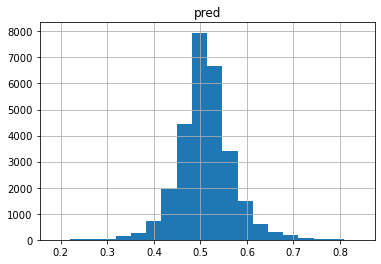

In [17]:
preds = []
for i in range(K):
    model = models[i]
    pred = model.predict(test_X)
    preds.append(pred)
    print(np.sum(pred) / pred.shape[0])
    
preds = np.array(preds)
preds = np.mean(preds, axis=0)
print(np.sum(preds) / preds.shape[0])


temp = pd.DataFrame({"pred":pred})
temp.hist(bins=20)

In [18]:
preds = np.where(preds < THRESHOLD, 0, 1)
print(np.sum(preds) / preds.shape[0])

submit_df = pd.DataFrame({'y': preds})
submit_df.index.name = 'id'
submit_df.to_csv('../Submissions/submission8.csv')

0.5859562455892731


In [19]:
importance = pd.DataFrame(models[1].feature_importance(), index=X.columns, columns=['importance']).sort_values('importance')
display(importance)

,importance
damage_min-special-A2,0
chakuchi-special-A,0
kyubanbomb_pitcher-special-A,0
curlingbomb_pitcher-special-A,0
quickbomb_pitcher-special-A,0
ultrahanko-special-A,0
splashbomb_pitcher-special-A,0
duration-special-A2,0
damage_max-special-A2,0
ink-sub-B1,0


In [20]:
X

,mode,stage,A1-rank,A1-level,A2-rank,A2-level,A3-rank,A3-level,A4-rank,A4-level,B1-rank,B1-level,B2-rank,B2-level,B3-rank,B3-level,B4-rank,B4-level,category1-A1,category2-A1,subweapon-A1,special-A1,mainweapon-A1,reskin-A1,range-main-A1,atack-main-A1,rapid-main-A1,vote-main-A1,fav-main-A1,damage_min-sub-A1,damage_max-sub-A1,ink-sub-A1,install_num-sub-A1,good-sub-A1,damage_min-special-A1,damage_max-special-A1,duration-special-A1,good-special-A1,category1-A2,category2-A2,subweapon-A2,special-A2,mainweapon-A2,reskin-A2,range-main-A2,atack-main-A2,rapid-main-A2,vote-main-A2,fav-main-A2,damage_min-sub-A2,damage_max-sub-A2,ink-sub-A2,install_num-sub-A2,good-sub-A2,damage_min-special-A2,damage_max-special-A2,duration-special-A2,good-special-A2,category1-A3,category2-A3,subweapon-A3,special-A3,mainweapon-A3,reskin-A3,range-main-A3,atack-main-A3,rapid-main-A3,vote-main-A3,fav-main-A3,damage_min-sub-A3,damage_max-sub-A3,ink-sub-A3,install_num-sub-A3,good-sub-A3,damage_min-special-A3,damage_max-special-A3,duration-special-A3,good-special-A3,category1-A4,category2-A4,subweapon-A4,special-A4,mainweapon-A4,reskin-A4,range-main-A4,atack-main-A4,rapid-main-A4,vote-main-A4,fav-main-A4,damage_min-sub-A4,damage_max-sub-A4,ink-sub-A4,install_num-sub-A4,good-sub-A4,damage_min-special-A4,damage_max-special-A4,duration-special-A4,good-special-A4,category1-B1,category2-B1,subweapon-B1,special-B1,mainweapon-B1,reskin-B1,range-main-B1,atack-main-B1,rapid-main-B1,vote-main-B1,fav-main-B1,damage_min-sub-B1,damage_max-sub-B1,ink-sub-B1,install_num-sub-B1,good-sub-B1,damage_min-special-B1,damage_max-special-B1,duration-special-B1,good-special-B1,category1-B2,category2-B2,subweapon-B2,special-B2,mainweapon-B2,reskin-B2,range-main-B2,atack-main-B2,rapid-main-B2,vote-main-B2,fav-main-B2,damage_min-sub-B2,damage_max-sub-B2,ink-sub-B2,install_num-sub-B2,good-sub-B2,damage_min-special-B2,damage_max-special-B2,duration-special-B2,good-special-B2,category1-B3,category2-B3,subweapon-B3,special-B3,mainweapon-B3,reskin-B3,range-main-B3,atack-main-B3,rapid-main-B3,vote-main-B3,fav-main-B3,damage_min-sub-B3,damage_max-sub-B3,ink-sub-B3,install_num-sub-B3,good-sub-B3,damage_min-special-B3,damage_max-special-B3,duration-special-B3,good-special-B3,category1-B4,category2-B4,subweapon-B4,special-B4,mainweapon-B4,reskin-B4,range-main-B4,atack-main-B4,rapid-main-B4,vote-main-B4,fav-main-B4,damage_min-sub-B4,damage_max-sub-B4,ink-sub-B4,install_num-sub-B4,good-sub-B4,damage_min-special-B4,damage_max-special-B4,duration-special-B4,good-special-B4,armor-special-A,nicedama-special-A,chakuchi-special-A,bubble-special-A,robotbomb_pitcher-special-A,amefurashi-special-A,jetpack-special-A,kyubanbomb_pitcher-special-A,presser-special-A,curlingbomb_pitcher-special-A,quickbomb_pitcher-special-A,missile-special-A,ultrahanko-special-A,sphere-special-A,splashbomb_pitcher-special-A,armor-special-B,nicedama-special-B,chakuchi-special-B,bubble-special-B,robotbomb_pitcher-special-B,amefurashi-special-B,jetpack-special-B,kyubanbomb_pitcher-special-B,presser-special-B,curlingbomb_pitcher-special-B,quickbomb_pitcher-special-B,missile-special-B,ultrahanko-special-B,sphere-special-B,splashbomb_pitcher-special-B,splashshield-subweapon-A,splashbomb-subweapon-A,poisonmist-subweapon-A,curlingbomb-subweapon-A,jumpbeacon-subweapon-A,quickbomb-subweapon-A,kyubanbomb-subweapon-A,pointsensor-subweapon-A,torpedo-subweapon-A,tansanbomb-subweapon-A,sprinkler-subweapon-A,trap-subweapon-A,robotbomb-subweapon-A,splashshield-subweapon-B,splashbomb-subweapon-B,poisonmist-subweapon-B,curlingbomb-subweapon-B,jumpbeacon-subweapon-B,quickbomb-subweapon-B,kyubanbomb-subweapon-B,pointsensor-subweapon-B,torpedo-subweapon-B,tansanbomb-subweapon-B,sprinkler-subweapon-B,trap-subweapon-B,robotbomb-subweapon-B,roller-category1-A,slosher-category1-A,shooter-category1-A,brella-category1-A,splatling-category1-A,charger-category1-A,roller-category1-B,slosher-category1-B,shooter-category1-B,brella-category1-B,splatling-category1-B,ch